## Завдання

Використовуючи датасет з файлу `train.csv`, побудуйте діаграми розподілу для
значень з поля «Age».

Заповніть пропущені значення в датасеті з файлу `train.csv`. 

Обґрунтуйте вибір способу заповнення пропущених значень.

### Розв'язок

In [69]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import shapiro

In [70]:
# Завантажуємо наш датасет

data = pd.read_csv("train.csv")
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [71]:
# Перевіряємо вибірку на нормальність, застосувавши Тест Шапіро-Вілка

data_age = data.copy()[['Age']]
stat, p = shapiro(data_age)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
 print('Probably Gaussian')
else:
 print('Probably not Gaussian')

stat=nan, p=1.000
Probably Gaussian


Text(0.5, 1.0, 'Діаграма розподілу змінної "Age"')

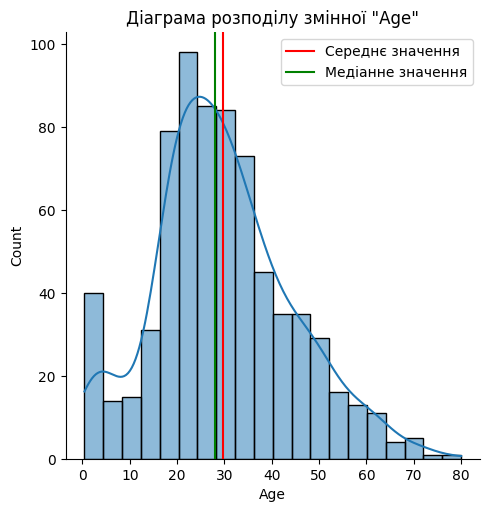

In [72]:
# Будуємо діаграму розподілу змінної 'Age'

sns.displot(data, x='Age', kde=True)
plt.axvline(x=data.Age.mean(), color='red', label='Середнє значення')
plt.axvline(x=data.Age.median(), color='green', label='Медіанне значення')
plt.legend(loc = 'upper right')
plt.title('Діаграма розподілу змінної "Age"')

### Заповнення пропущених значень для поля Age

In [74]:
# Інформація по датасету

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [75]:
# Прпущені значення - кількість

data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [79]:
# Заповнюємо в полі Age пропущені значення на середнє значення по цій колонці. Дані додатково не групуються

data['Age_Fill_Mean'] = data.copy()[['Age']]
data['Age_Fill_Mean'].fillna(data_age_1['Age'].mean(), inplace = True)

In [80]:
# Заповнюємо пропущені значення медіаним значенням. Цей метод застосовуємо до згрупованих об'єктів

data['Age_Fill_Median'] = data.groupby(['Pclass', 'Sex'], group_keys=False)['Age'].apply(lambda x: x.fillna(x.median()))

In [81]:
# Заповнюємо пропущені значення методом bfill + ffill. Цей метод застосовуємо до згрупованих об'єктів

data['Age_Fill_b+f'] = data.groupby(['Pclass', 'Sex'], group_keys=False)['Age'].apply(lambda x: x.bfill().ffill())
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Fill_Mean,Age_Fill_b+f,Age_Fill_Median
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,22.000000,22.0,22.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38.000000,38.0,38.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,26.000000,26.0,26.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,35.000000,35.0,35.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,35.000000,35.0,35.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,27.000000,27.0,27.0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,19.000000,19.0,19.0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,29.699118,39.0,21.5
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,26.000000,26.0,26.0


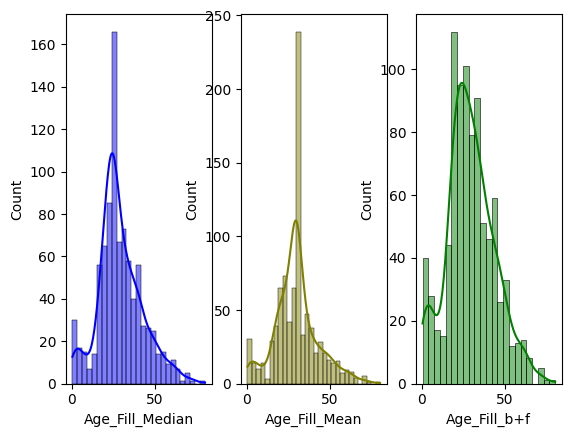

In [82]:
# Розподіл змінних 'Age_Fill_Median', 'Age_Fill_Mean' та 'Age_Fill_b+f'.

fig, axs = plt.subplots(1, 3)
sns.histplot(data=data, x="Age_Fill_Median", color="blue", kde=True, ax=axs[0])
sns.histplot(data=data, x="Age_Fill_Mean", color="olive", kde=True, ax=axs[1])
sns.histplot(data=data, x="Age_Fill_b+f", color="green", kde=True, ax=axs[2])
plt.show()

### Висновки:

Ми розглянули 3 способи заповнення пропущених значень. Як на мене, 
метод із заповненням попередній елемент + наступний (bfill + ffill) показав самий зрівноважений результат. Далі йде метод із медіанного значення на згрупованих данних та самий незрівноважений результат з використанням незгрупованих данних. Але остаточно оцінити ефективність того чи іншого методу можна буде за результатами прогнозування нашого цільового показника в полі Survived.